In [1]:
from datetime import datetime
import io

import matplotlib.pyplot as plt
import math

from obspy.geodetics.base import gps2dist_azimuth
from obspy.imaging.beachball import beachball
from obspy.imaging.beachball import beach
from libcomcat.dataframes import get_detail_data_frame
from libcomcat.search import search, get_event_by_id

In [2]:
# Paths to save data

outfilename = 'C:\\your\\path'
  

In [3]:
# Search and download earthquake data from libcomcat

# Download in a cricle,
#summary_events = search(starttime=datetime(1994, 1, 17, 12, 30), endtime=datetime(1997, 1, 18, 12, 35),
#                  maxradiuskm=3, minmagnitude=3, maxmagnitude=8, latitude=38.806467, longitude=-122.449948)

# Download in a box,
box_events = search(starttime=datetime(1984, 1, 1, 12, 30), endtime=datetime(2020, 12, 31, 12, 0), minmagnitude=3,
                   minlatitude=38.884431, maxlatitude=39.370466, minlongitude=-123.296648, maxlongitude=-122.861249)

detail_df = get_detail_data_frame(box_events)



C:\ProgramData\Anaconda3\envs\eq_env\lib\site-packages\obspy\imaging\beachball.py:250: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(3, 3), dpi=100)


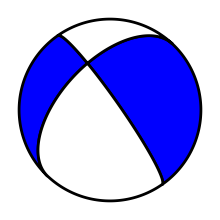

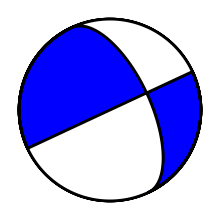

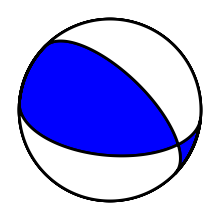

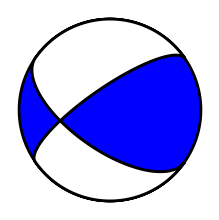

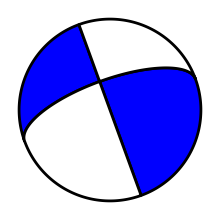

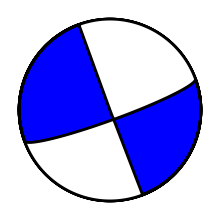

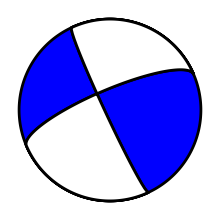

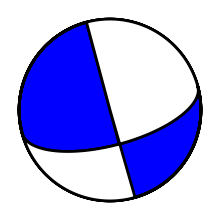

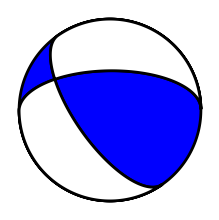

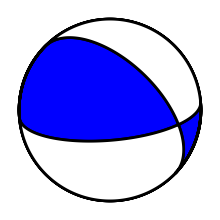

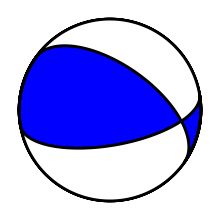

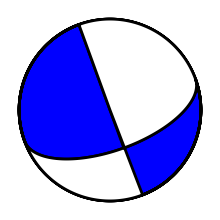

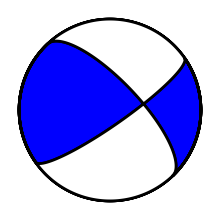

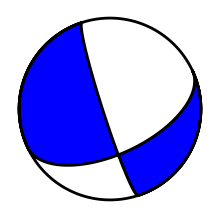

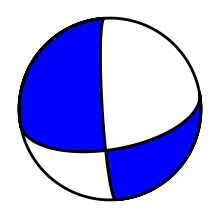

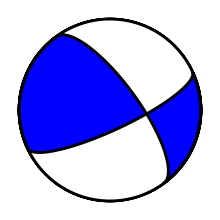

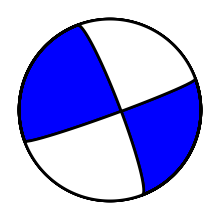

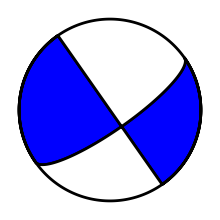

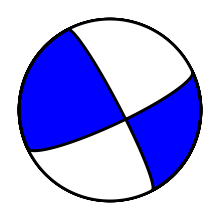

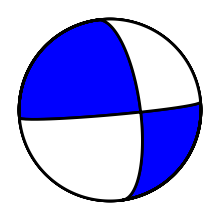

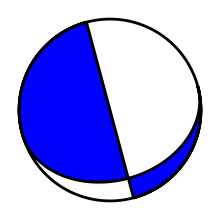

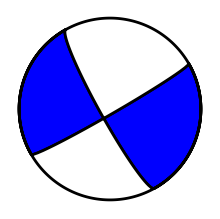

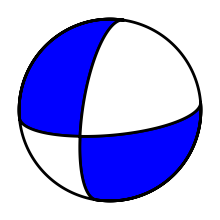

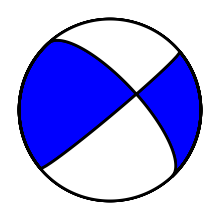

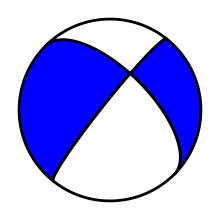

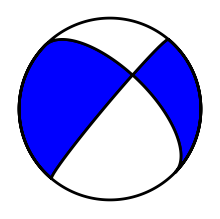

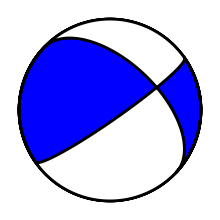

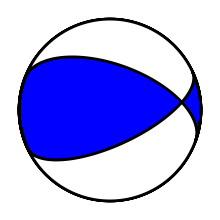

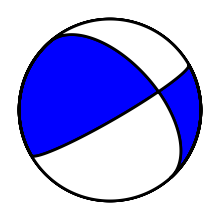

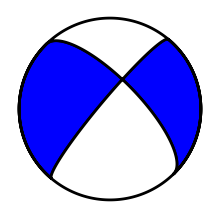

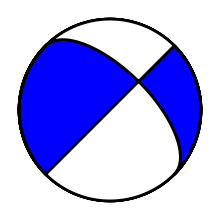

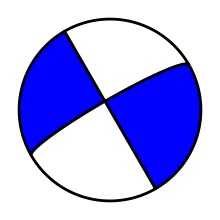

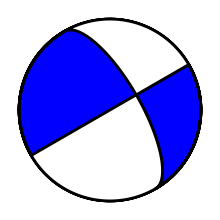

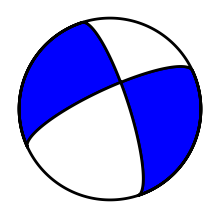

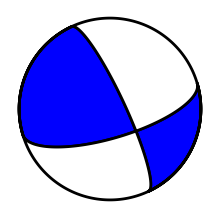

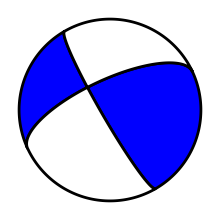

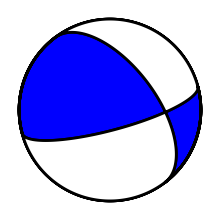

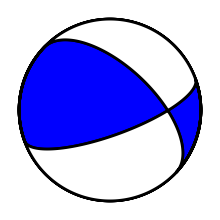

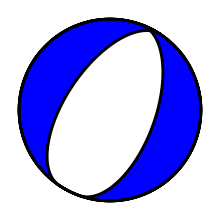

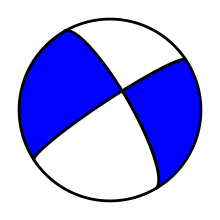

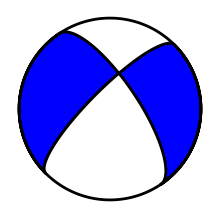

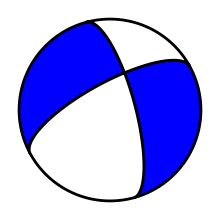

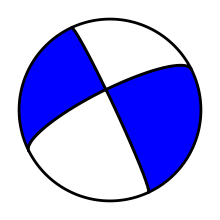

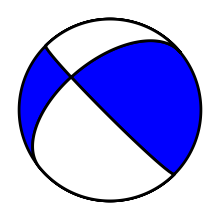

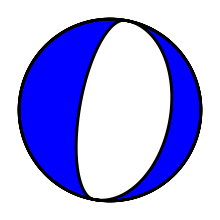

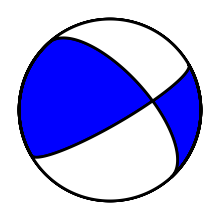

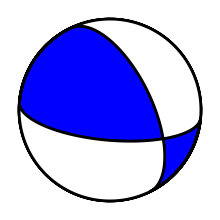

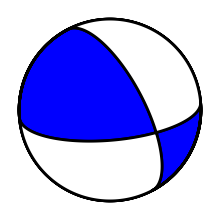

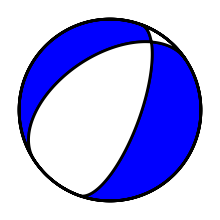

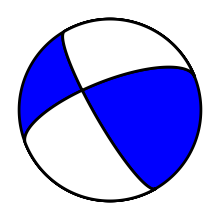

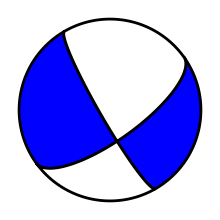

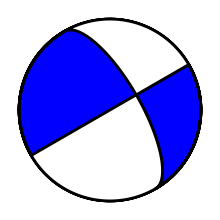

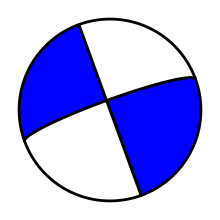

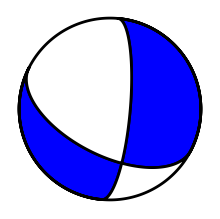

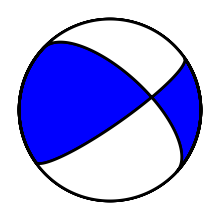

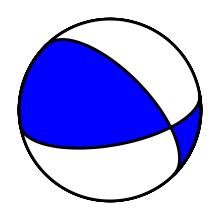

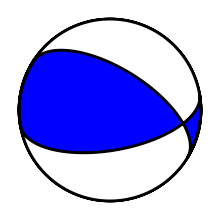

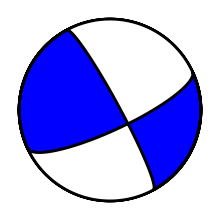

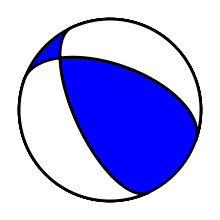

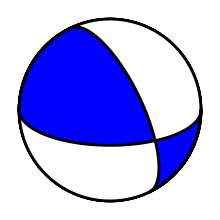

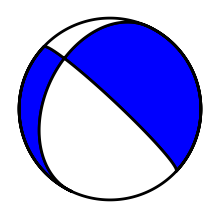

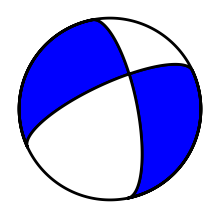

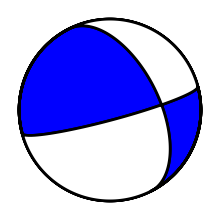

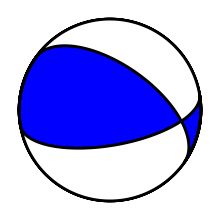

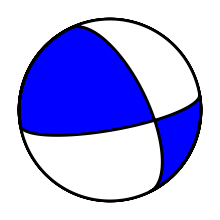

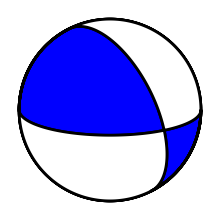

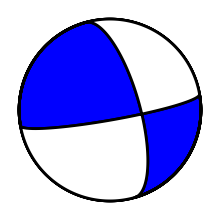

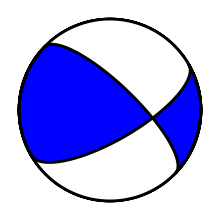

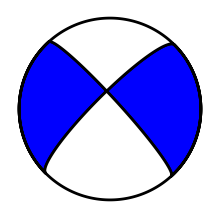

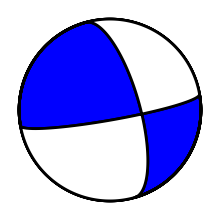

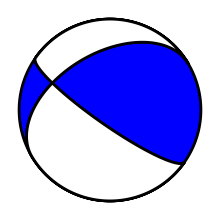

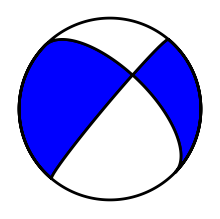

In [4]:
#Print and save focal mechanism

mt = []
name = []
for i in range(0,len(detail_df)):
    if math.isnan(detail_df.nc_np1_strike[i]):
        pass
    else:
        mt_step = [detail_df.nc_np1_strike[i], detail_df.nc_np1_dip[i], detail_df.nc_np1_rake[i]]
        mt.append(mt_step)
        name_step = detail_df.id[i]
        name.append(name_step)

for i in range(0,len(mt)):
    f = beachball(mt[i], outfile = outfilename + '\\%s.svg' % name[i])

  

In [5]:
# Remove data rows with NaN values in focal mechanisms for data export

df = detail_df.dropna(subset=['nc_np1_strike'])

In [7]:
# Save data as csv for plotting in GIS

df.to_csv('1984-2020.csv')

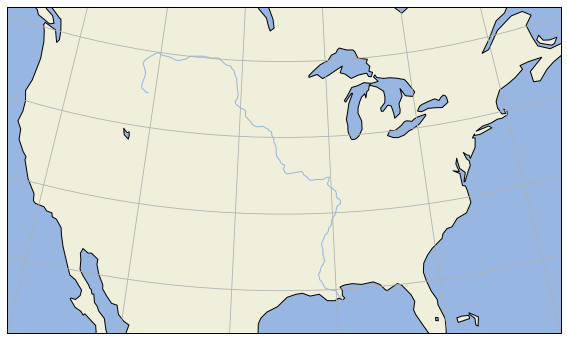

In [24]:
import numpy as np
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import numpy as np

central_lat = 37.5
central_lon = -96
extent = [-120, -70, 24, 50.5]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.AlbersEqualArea(central_lon, central_lat))
ax.set_extent(extent)

ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND, edgecolor='black')
ax.add_feature(cartopy.feature.LAKES, edgecolor='black')
ax.add_feature(cartopy.feature.RIVERS)
ax.gridlines()

SANTA ROSA SONOMA CO AP 
UKIAH MUNI AP 


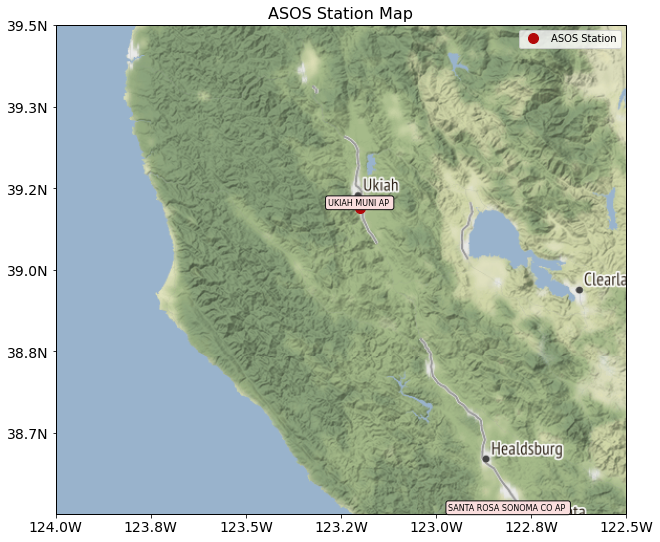

In [35]:
# Mapping ASOS Weather Stations Across New York City and Annotating Them
# This code uses a spoofing algorithm to avoid bounceback from OSM servers
# -- This code also parses lat/lon information from the ASOS station .txt
# -- file located here: ftp://ftp.ncdc.noaa.gov/pub/data/ASOS_Station_Photos/asos-stations.txt
#
import csv
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.io.img_tiles as cimgt
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import io
from urllib.request import urlopen, Request
from PIL import Image

def image_spoof(self, tile): # this function pretends not to be a Python script
    url = self._image_url(tile) # get the url of the street map API
    req = Request(url) # start request
    req.add_header('User-agent','Anaconda 3') # add user agent to request
    fh = urlopen(req) 
    im_data = io.BytesIO(fh.read()) # get image
    fh.close() # close url
    img = Image.open(im_data) # open image with PIL
    img = img.convert(self.desired_tile_form) # set image format
    return img, self.tileextent(tile), 'lower' # reformat for cartopy

################################
# parsing the ASOS coordinates
################################
#
asos_data = []
with open('C:\\your\\path\\asos-stations.txt','r') as dat_file:
    reader = csv.reader(dat_file)
    for row in reader:
        asos_data.append(row)

row_delin = asos_data[3][0].split(' ')[:-1]
col_sizes = [len(ii) for ii in row_delin]

col_header = []; iter_ii = 0
for ii,jj in enumerate(col_sizes):
    col_header.append(asos_data[2][0][iter_ii:iter_ii+col_sizes[ii]].replace(' ',''))
    iter_ii+=col_sizes[ii]+1
    
call,names,lats,lons,elevs = [],[],[],[],[]
for row in asos_data[4:]:
    data = []; iter_cc = 0
    for cc in range(0,len(col_header)):
        data.append(row[0][iter_cc:iter_cc+col_sizes[cc]].replace('  ',''))
        iter_cc+=col_sizes[cc]+1
    call.append(data[3])
    names.append(data[4])
    lats.append(float(data[9]))
    lons.append(float(data[10]))
    elevs.append(float(data[11]))

#######################################
# Formatting the Cartopy plot
#######################################
#
cimgt.Stamen.get_image = image_spoof # reformat web request for street map spoofing
osm_img = cimgt.Stamen('terrain') # spoofed, downloaded street map

fig = plt.figure(figsize=(12,9)) # open matplotlib figure
ax1 = plt.axes(projection=osm_img.crs) # project using coordinate reference system (CRS) of street map
ax1.set_title('ASOS Station Map',fontsize=16)
# extent = [-124.7844079,-66.9513812, 24.7433195, 49.3457868] # Contiguous US bounds
extent = [-124,-122.5,38.5,39.5] # NYC bounds
ax1.set_extent(extent) # set extents
ax1.set_xticks(np.linspace(extent[0],extent[1],7),crs=ccrs.PlateCarree()) # set longitude indicators
ax1.set_yticks(np.linspace(extent[2],extent[3],7)[1:],crs=ccrs.PlateCarree()) # set latitude indicators
lon_formatter = LongitudeFormatter(number_format='0.1f',degree_symbol='',dateline_direction_label=True) # format lons
lat_formatter = LatitudeFormatter(number_format='0.1f',degree_symbol='') # format lats
ax1.xaxis.set_major_formatter(lon_formatter) # set lons
ax1.yaxis.set_major_formatter(lat_formatter) # set lats
ax1.xaxis.set_tick_params(labelsize=14)
ax1.yaxis.set_tick_params(labelsize=14)

scale = np.ceil(-np.sqrt(2)*np.log(np.divide((extent[1]-extent[0])/2.0,350.0))) # empirical solve for scale based on zoom
scale = (scale<20) and scale or 19 # scale cannot be larger than 19
ax1.add_image(osm_img, int(scale)) # add OSM with zoom specification

#######################################
# Plot the ASOS stations as points
#######################################
#
ax1.plot(lons, lats, markersize=10,marker='o',linestyle='',color='#b30909',transform=ccrs.PlateCarree(),label='ASOS Station')
transform = ccrs.PlateCarree()._as_mpl_transform(ax1) # set transform for annotations
# text annotations
for lat_s,lon_s,name_s in zip(lats,lons,names): # loop through lats/lons/names
    if lon_s>extent[0] and lon_s<extent[1] and lat_s>extent[2] and lat_s<extent[3]:
        print(name_s)
        # annotations, with some random placement to avoid overlap
        ax1.text(lon_s, lat_s+(np.random.randn(1)*0.01),name_s, {'color': 'k', 'fontsize': 8},
                 horizontalalignment='center', verticalalignment='bottom',
                 clip_on=False,transform=transform,bbox=dict(boxstyle="round",
                   ec='#121212', fc='#fadede'))

ax1.legend() # add a legend 
plt.show() # show plot